In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample
import re
import joblib
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np


In [2]:
fake = pd.read_csv('fake.csv')
true = pd.read_csv('true.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake['class']=0
true['class']=1

In [6]:
data = pd.concat([fake,true], axis = 0)

In [7]:
data.sample(20)

,title,text,subject,date,class
19253,BOOM! TX Governor Will CUT FUNDING To County W...,Soon after newly elected Travis County Sheriff...,left-news,"Jan 23, 2017",0
4346,Donald Trump’s ‘Charity’ Foundation Is About ...,Things really aren t looking too great for Don...,News,"October 5, 2016",0
10566,CNN ANCHOR DON LEMON: A Republican Winning in ...,CNN anchor Don Lemon got snarky during reporti...,politics,"Jun 21, 2017",0
17257,FEMA DENIES AID TO BALTIMORE FOR RIOT DAMAGES ...,Remember this? Mayor Rawlings-Blake says that ...,Government News,"Jun 19, 2015",0
4277,Melania Quite Possibly Tried To Troll The Pre...,"Melania Trump, standing by her man despite bei...",News,"October 10, 2016",0
8034,President Obama Mocks Conservatives That Clai...,President Barack Obama has addressed the ridic...,News,"February 17, 2016",0
17638,DEMOCRAT SENATOR AL FRANKEN Thought It Would B...,Democratic Senator Al Franken who has been a...,left-news,"Nov 16, 2017",0
10514,"Republicans in tailspin, group forms to draft ...",WASHINGTON (Reuters) - With U.S. Republicans s...,politicsNews,"March 4, 2016",1
13592,Barnier says 'still working' on Brexit terms w...,BERLIN (Reuters) - The European Union s chief ...,worldnews,"November 29, 2017",1
9641,"‘ALL HAT, NO CATTLE’: Sarah Sanders Hits Back ...",Sarah Sanders hit back at criticism that Gener...,politics,"Oct 20, 2017",0


In [8]:
data = data.drop(["title","subject","date"], axis = 1)

In [9]:
data.reset_index(inplace=True)

In [10]:
data.drop(['index'],axis=1,inplace=True)

In [11]:
data.sample


<bound method NDFrame.sample of                                                     text  class
0      Donald Trump just couldn t wish all Americans ...      0
1      House Intelligence Committee Chairman Devin Nu...      0
2      On Friday, it was revealed that former Milwauk...      0
3      On Christmas day, Donald Trump announced that ...      0
4      Pope Francis used his annual Christmas Day mes...      0
...                                                  ...    ...
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...      1
44894  LONDON (Reuters) - LexisNexis, a provider of l...      1
44895  MINSK (Reuters) - In the shadow of disused Sov...      1
44896  MOSCOW (Reuters) - Vatican Secretary of State ...      1
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...      1

[44898 rows x 2 columns]>

In [12]:
data.sample(5)

,text,class
21912,The Michael Brown and Eric Garner cases have o...,0
19213,Barack Obama has to be the world s biggest hyp...,0
27910,"WASHINGTON (Reuters) - In a last-ditch effort,...",1
2587,"Yesterday, White House counselor Kellyanne Con...",0
14149,Where s The Muppet Dressed As A Nun?Oh wait th...,0


In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[*?.\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [14]:
data['text'] = data['text'].apply(clean_text)

In [15]:
data.sample(15)


,text,class
43546,kirkuk iraq reuters the governor of iraq s oi...,1
36773,aboard a us military aircraft reuters us defe...,1
10048,you just can t make this stuff up the leftist ...,0
38880,barcelona reuters a strike called across cata...,1
9154,who knew he had it in him senate majority lead...,0
40713,strasbourg france reuters europe s top human ...,1
44631,mexico city reuters at least three people die...,1
660,donald trump doesn t just flip flop on his cam...,0
32265,reuters the new black panther party a “black ...,1
16531,next stop after brexit is the us judge jeanine...,0


In [16]:
true = resample(true,
                replace=True,  # allow duplicates
                 n_samples=len(fake),  # match fake_df size
                random_state=42)

# Step 3: Combine the balanced datasets
balance = pd.concat([fake, true], ignore_index=True)

# Optional: Shuffle the combined dataset
balance = balance.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Save or use the balanced dataset
balance.to_csv('balanced_dataset.csv', index=False)


In [17]:
df = pd.read_csv('balanced_dataset.csv')

In [18]:
print(balance.columns)

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [19]:
data.sample(20)


,text,class
9614,serial liar and democrat presidential hopeful...,0
18681,someone needs to educate ellen degeneres on pr...,0
15050,of course hillary manages to turn the question...,0
9421,several uncomfortable videos have surfaced thi...,0
20341,this is a good reminder of how important it is...,0
1467,the hosts of fox friends just got their asses...,0
9140,what a bizarre exchange between a reporter and...,0
24627,this story corrects ninth paragraph to say th...,1
20753,the boston globe ran a sunday edition with a f...,0
37670,washington reuters the united states on tuesd...,1


In [20]:
balance['class']  # if your label column is named 'class'

0        0
1        1
2        0
3        1
4        0
        ..
46957    0
46958    1
46959    1
46960    0
46961    0
Name: class, Length: 46962, dtype: int64

In [21]:
balance.rename(columns={'class': 'label'}, inplace=True)

<Axes: xlabel='label', ylabel='count'>

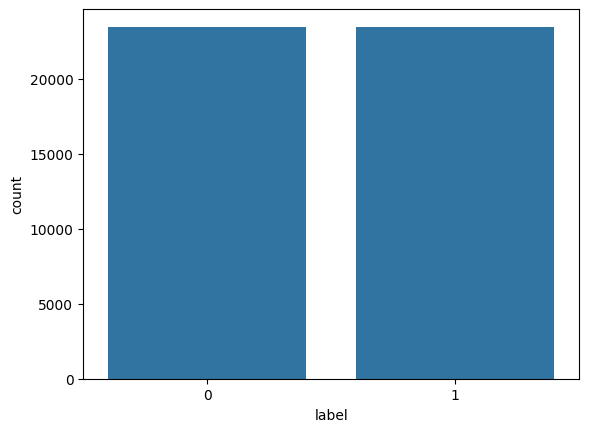

In [22]:
sns.countplot(data=balance, x='label', order=balance['label'].value_counts().index)

In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[*?.\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text



In [24]:
data['text'] = data['text'].apply(clean_text)

In [25]:
data.sample(100)

,text,class
17248,this administration has to be the most bumblin...,0
10734,chaos broke out after legal americans and ille...,0
44492,taipei reuters taiwan has appointed as premier...,1
3855,democrats who are offering to work with donald...,0
5437,the founding fathers are rolling in their grav...,0
...,...,...
29471,beirut reuters syrian rebels urged president d...,1
32146,new york reuters the democratic party has sele...,1
21477,an angry black gay racist democrat victim the ...,0
5064,during a segment of triumph s summer election ...,0


In [26]:
print(df.isnull().sum())


title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [27]:
# Split the balanced dataset into train and test sets
X = balance['text']
y = balance['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4607
           1       0.98      0.99      0.99      4786

    accuracy                           0.99      9393
   macro avg       0.99      0.99      0.99      9393
weighted avg       0.99      0.99      0.99      9393



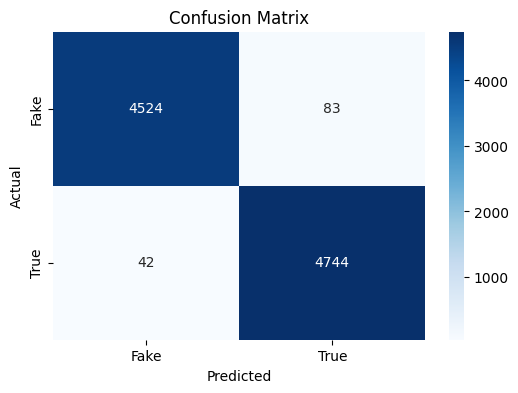

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

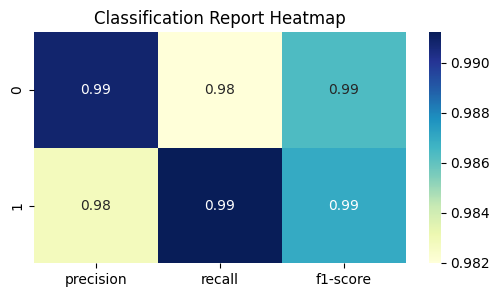

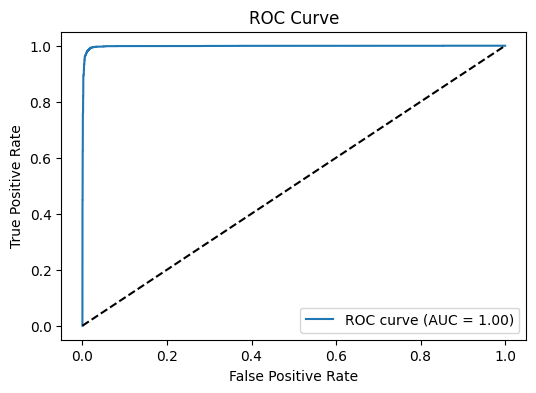

In [29]:
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np

# Classification report as heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # Only 'Fake' and 'True' rows, and precision/recall/f1
plt.figure(figsize=(6,3))
sns.heatmap(report_df, annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:


# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
    

    print("Model and vectorizer saved successfully.")



Model and vectorizer saved successfully.
